In [1]:
pacman::p_load(dplyr,ggplot2)

In [2]:
nutrients_in<-read.csv("nutrients_1516_2090_6071_1212.csv")

In [3]:
nutrients_in

Strain,Position,Replicate,Volume..mL.,Measured.concentration..cell.mL.,Total.cells,Date.Collected,Date.Dried.60C.overnight,Date.Prepped.for.Nutrient.Analysis,Plate.1.or.2,Position.in.plate,Sample.ID,Tray,umol.N,pmol.N.cell..1,umol.C,pmol.C.cell..1,N.C
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1516,6,A,11.5,337796.70,3880000,2/14/23,3/21/23,3/22/23,1,A1,A1,1,BDL,#VALUE!,9.007,2.319,#VALUE!
1516,6,B,11.5,342818.60,3940000,2/14/23,3/21/23,3/22/23,1,A2,A2,1,BDL,#VALUE!,8.909,2.260,#VALUE!
1516,6,C,11.5,241834.40,2780000,2/14/23,3/21/23,3/22/23,1,A3,A3,1,0.272,9.78854E-08,5.950,2.140,4.57E-02
2090,13,A,11,137093.40,1510000,1/30/23,3/21/23,3/22/23,1,A4,A4,1,0.404,2.67758E-07,5.285,3.504,7.64E-02
2090,13,B,11,196588.20,2160000,1/30/23,3/21/23,3/22/23,1,A5,A5,1,BDL,#VALUE!,5.969,2.760,#VALUE!
2090,13,C,11,172874.30,1900000,1/30/23,3/21/23,3/22/23,1,A6,A6,1,0.478,2.51126E-07,6.433,3.383,7.42E-02
1516,12,A,12,121430.20,1460000,1/30/23,3/21/23,3/22/23,1,B1,B1,1,0.257,1.76461E-07,2.368,1.625,1.09E-01
1516,12,B,12,122141.20,1470000,1/30/23,3/21/23,3/22/23,1,B2,B2,1,0.274,1.87037E-07,2.604,1.777,1.05E-01
1516,12,C,11.5,155138.40,1780000,1/30/23,3/21/23,3/22/23,1,B3,B3,1,BDL,#VALUE!,2.487,1.394,#VALUE!


In [ ]:
ggplot(nutrients_in) + geom_point(aes(x = as.numeric(Position), y = pmol.C.cell..1, color=factor(Strain))) + 
    theme_bw(base_size=12) + facet_wrap(~Strain) + scale_y_log10() + 
    ylab("log10 pmol C per cell") + xlab("Position")

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message:
“Removed 6 rows containing missing values
(`geom_point()`).”


Warning message:
“There was 1 warning in `dplyr::mutate()`.
ℹ In argument: `Position = case_when(Strain ==
  "blank" ~ 0, TRUE ~ as.numeric(Position))`.
Caused by warning:
! NAs introduced by coercion”
Warning message:
“Removed 3 rows containing missing values
(`geom_point()`).”


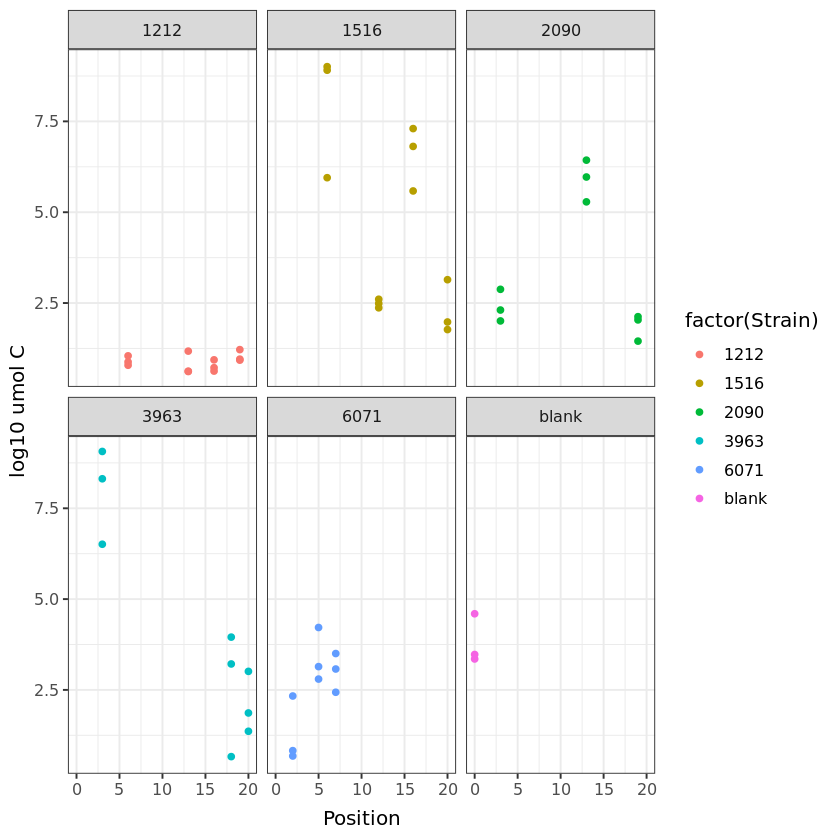

In [5]:
ggplot(nutrients_in %>% dplyr::mutate(Position = case_when(Strain=="blank"~0,
                                                TRUE ~ as.numeric(Position)))) + 
    geom_point(aes(x = (Position), y = umol.C, color=factor(Strain))) + 
    theme_bw(base_size=12) + facet_wrap(~Strain) + #scale_y_log10() + 
    ylab("log10 umol C") + xlab("Position")

Warning message:
“There was 1 warning in `dplyr::mutate()`.
ℹ In argument: `Position = case_when(Strain ==
  "blank" ~ 0, TRUE ~ as.numeric(Position))`.
Caused by warning:
! NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message:
“Removed 3 rows containing missing values
(`stat_boxplot()`).”
Warning message:
“Removed 22 rows containing non-finite values
(`stat_boxplot()`).”


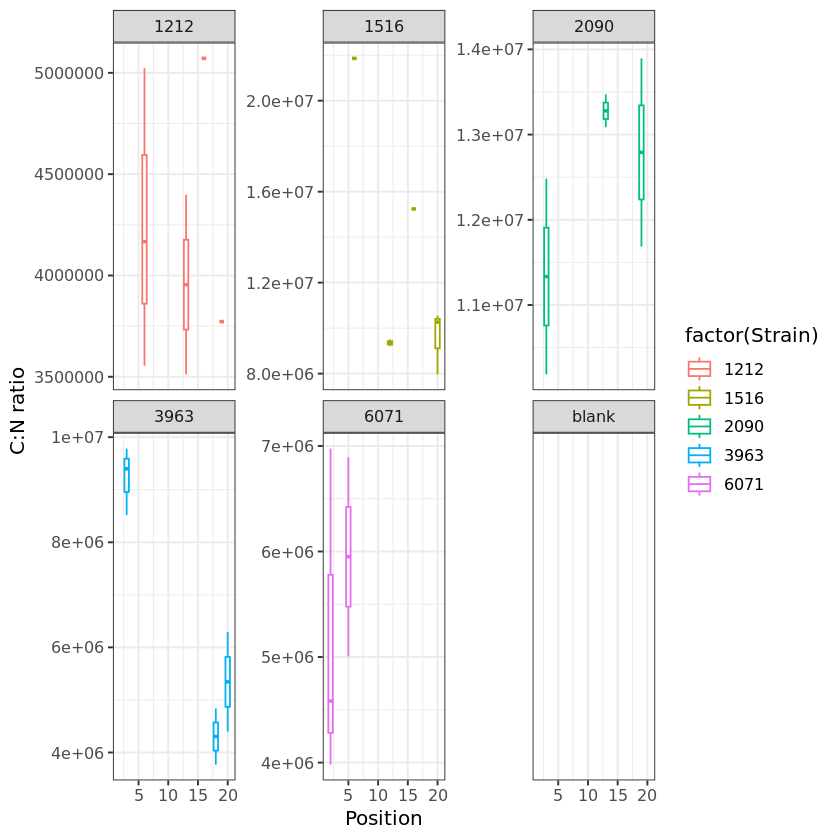

In [6]:
ggplot(nutrients_in %>% dplyr::mutate(Position = case_when(Strain=="blank"~0,
                                                TRUE ~ as.numeric(Position)))) + 
    geom_boxplot(aes(x = Position, y = as.numeric(pmol.C.cell..1)/as.numeric(pmol.N.cell..1), 
                     color=factor(Strain),group=paste0(Position,Strain))) + 
    theme_bw(base_size=12) + facet_wrap(~Strain,scales="free_y") + ylab("C:N")+
    ylab("C:N ratio") + xlab("Position")

Warning message:
“There was 1 warning in
`dplyr::mutate()`.
ℹ In argument: `Position =
  case_when(Strain == "blank" ~ 0, TRUE
  ~ as.numeric(Position))`.
Caused by warning:
! NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message:
“Removed 25 rows containing missing
values (`geom_point()`).”


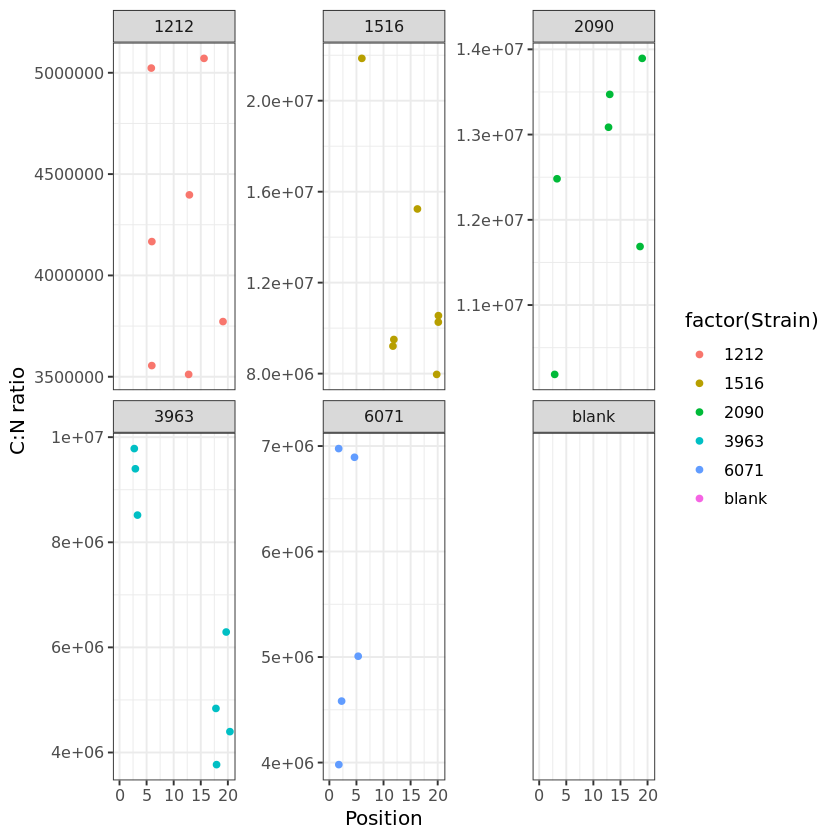

In [16]:
ggplot(nutrients_in %>% dplyr::mutate(Position = case_when(Strain=="blank"~0,
                                                TRUE ~ as.numeric(Position)))) + 
    geom_jitter(aes(x = Position, y = as.numeric(pmol.C.cell..1)/as.numeric(pmol.N.cell..1), 
                     color=factor(Strain),group=paste0(Position,Strain))) + 
    theme_bw(base_size=12) + facet_wrap(~Strain,scales="free_y") + ylab("C:N")+
    ylab("C:N ratio") + xlab("Position")

### PIC test 11 May

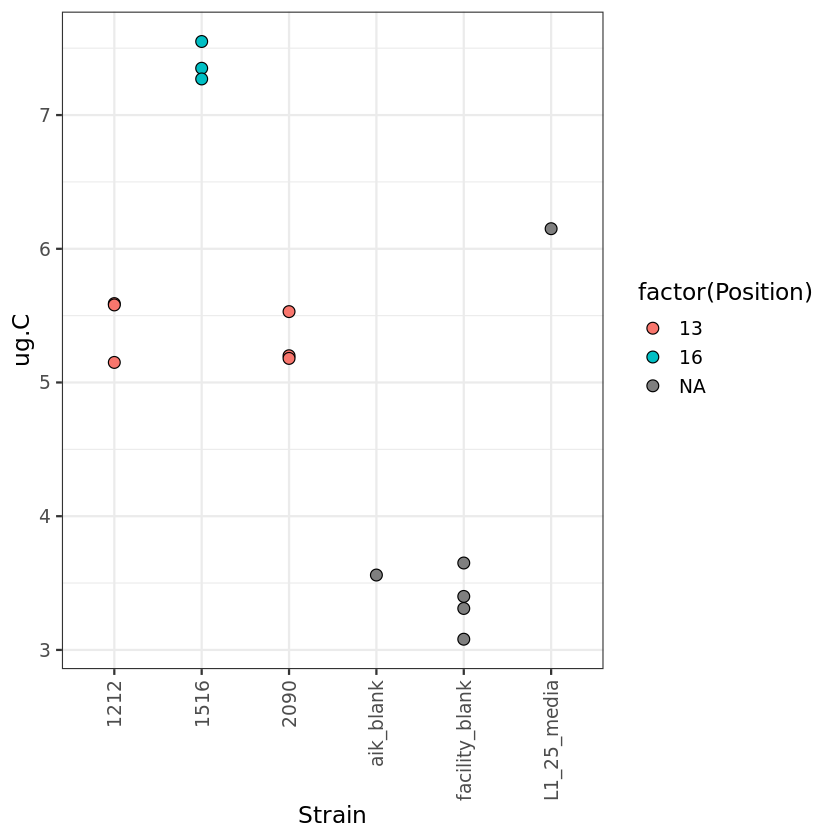

In [7]:
ggplot(read.csv("pic_test_11may23.csv",sep="\t")) + 
    geom_point(aes(x = Strain, y = ug.C,fill=factor(Position)),pch=21,size=3) + 
    theme_bw(base_size=14)+ 
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

Warning message:
“Removed 6 rows containing missing values
(`geom_point()`).”


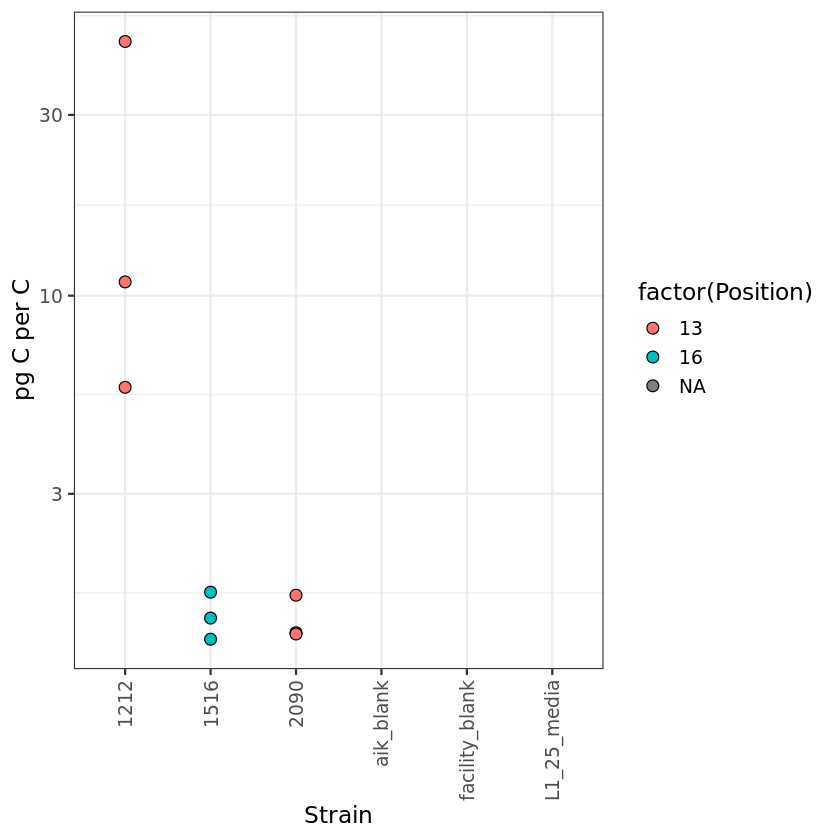

In [8]:
ggplot(read.csv("pic_test_11may23.csv",sep="\t")) + 
    geom_point(aes(x = Strain, y = PerCellpgC,fill=factor(Position)),pch=21,size=3) + 
    theme_bw(base_size=14)+ 
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) + scale_y_log10() + 
    ylab("pg C per C")

### PIC test 17 May

In [9]:
pic_test<-read.csv("PIC_datasheet.csv")

In [10]:
colnames(pic_test)

[1] "Strain"                                          
 [2] "Position"                                        
 [3] "Rep"                                             
 [4] "Volume..mL."                                     
 [5] "Measured.concentration..cell.mL."                
 [6] "Errata"                                          
 [7] "Date.Collected"                                  
 [8] "Date.Dried.60C.overnight"                        
 [9] "Date.Prepped.for.Nutrient.Analysis"              
[10] "PIC..ug.C."                                      
[11] "MEDIA.BLANK"                                     
[12] "DRY.BLANK"                                       
[13] "PIC..pg.C.cell..no.media.blank..just.background."
[14] "PIC..pg.C.cell."                                 
[15] "X"                                               
[16] "X.1"                                             
[17] "X.2"                                             
[18] "X.3"                                             
[19] "X.4"                                             
[20] "X.5"                                             
[21] "X.6"                                             
[22] "X.7"                                             
[23] "X.8"                                             
[24] "X.9"

In [11]:
pic_test %>% dplyr::select(Strain,Position,PIC..pg.C.cell.,PIC..pg.C.cell..no.media.blank..just.background.)

Strain,Position,PIC..pg.C.cell.,PIC..pg.C.cell..no.media.blank..just.background.
<int>,<chr>,<dbl>,<dbl>
1516,6,NA,NA
1516,6,NA,NA
1516,6,NA,NA
2090,13,-0.52,1.09
2090,13,-0.21,0.91
2090,13,-0.43,0.85
1516,12,NA,NA
1516,12,NA,NA
1516,12,NA,NA


Joining with `by = join_by(Strain)`
Warning message:
“Continuous limits supplied to discrete scale.
ℹ Did you mean `limits = factor(...)` or
  `scale_*_continuous()`?”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message:
“Removed 30 rows containing missing values
(`geom_point()`).”


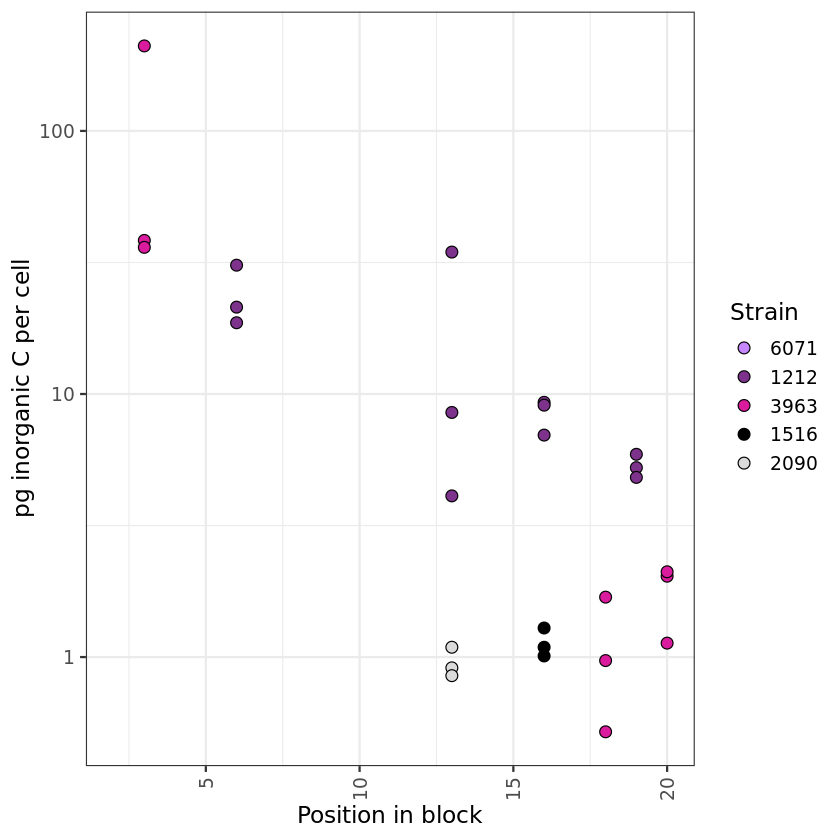

In [12]:
strain_color_frame_harriet = data.frame("Strains_full"=c("RCC6856","RCC6071","RCC1212","RCC3963",
                                                   "RCC874","CCMP1280","RCC4567","RCC914","RCC3492",
                                                   "CCMP371","RCC1215","CCMP377","RCC1239",
                                                   "RCC1222","RCC1256","CCMP74","CCMP379","CCMP1516",
                                                   "CCMP2090","CCMP375"),
                                        "Strain"=c("6856","6071","1212","3963",
                                                   "874","1280","4567","914","3492",
                                                   "371","1215","377","1239",
                                                   "1222","1256","374","379","1516",
                                                   "2090","375"),
                                        "Colors"=c("#4443c6","#c688ff","#7d328b","#da1b9d",
                                                  "#f87fa2","#b90033","#ff5755","#c31d0b",
                                                  "#ff6235","#ffc10c","#e4e366","#5a9f00",
                                                  "#60b574","#00b9bf","#0194e3","#C2C95E",
                                                  "#5EC9C9","#000000","#DBDBDB","dark green")) %>%
    dplyr::mutate(Strain=as.numeric(Strain)) %>%
    dplyr::filter(Strain%in%unique(pic_test$Strain))

ggplot(pic_test %>% dplyr::left_join(strain_color_frame_harriet %>% dplyr::mutate(Strain=as.numeric(Strain)))) + 
    geom_point(aes(x = as.numeric(Position), y = PIC..pg.C.cell..no.media.blank..just.background.,
                   fill=factor(Strain)),pch=21,size=3) + 
    theme_bw(base_size=14)+ 
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) + scale_y_log10() + 
    ylab("pg inorganic C per cell") + xlab("Position in block") + 
    scale_fill_manual(limits=strain_color_frame_harriet$Strain,values=strain_color_frame_harriet$Colors,
                      name="Strain")

Joining with `by = join_by(Strain)`
Warning message:
“Continuous limits supplied to discrete scale.
ℹ Did you mean `limits = factor(...)` or
  `scale_*_continuous()`?”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message:
“Removed 30 rows containing missing values
(`geom_point()`).”


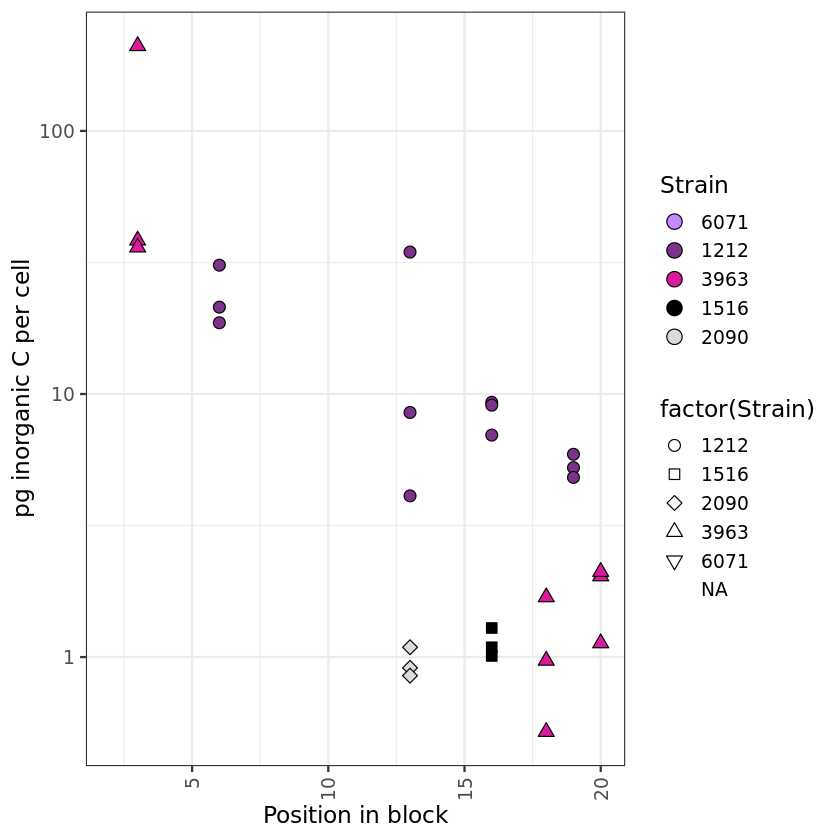

In [23]:
ggplot(pic_test %>% dplyr::left_join(strain_color_frame_harriet %>% dplyr::mutate(Strain=as.numeric(Strain)))) + 
    geom_point(aes(x = as.numeric(Position), y = PIC..pg.C.cell..no.media.blank..just.background.,
                   fill=factor(Strain),shape=factor(Strain)),size=3) + 
    theme_bw(base_size=14)+ scale_shape_manual(values=c(21,22,23,24,25)) + 
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) + scale_y_log10() + 
    ylab("pg inorganic C per cell") + xlab("Position in block") + 
    scale_fill_manual(limits=strain_color_frame_harriet$Strain,values=strain_color_frame_harriet$Colors,
                      name="Strain")+
    guides(fill = guide_legend(override.aes = list(shape=21,size=4)))